### Detecting & Handling Imbalanced Data: Visualizing Class Imbalance
**Question**: Load the Credit Card Fraud Detection dataset and visualize the class imbalance. Then apply random undersampling to balance it.

Original Class Distribution:
Class
0    6
1    4
Name: count, dtype: int64


/tmp/ipykernel_32081/370034173.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set2')


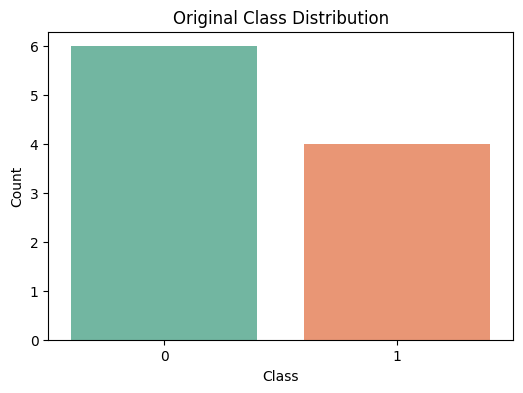


Balanced Class Distribution:
Class
0    4
1    4
Name: count, dtype: int64


/tmp/ipykernel_32081/370034173.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set2')


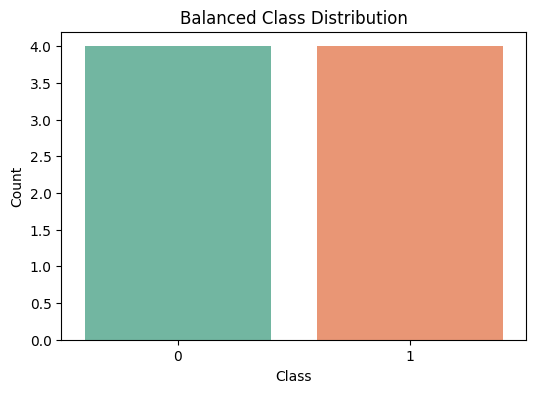

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

def load_data(path):
    try:
        df = pd.read_csv(path)
        if 'Class' not in df.columns:
            raise ValueError("Dataset must contain a 'Class' column.")
        return df
    except FileNotFoundError:
        raise FileNotFoundError("File not found. Please provide a valid path.")
    except pd.errors.ParserError:
        raise ValueError("Malformed CSV file.")
    except Exception as e:
        raise RuntimeError(f"Unexpected error: {e}")

def visualize_class_distribution(df, title="Class Distribution"):
    plt.figure(figsize=(6,4))
    sns.countplot(x='Class', data=df, palette='Set2')
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

def balance_data(df):
    df_majority = df[df['Class'] == 0]
    df_minority = df[df['Class'] == 1]

    if df_minority.empty:
        raise ValueError("No fraud cases (Class=1) found for balancing.")

    df_majority_downsampled = resample(df_majority, 
                                       replace=False,
                                       n_samples=len(df_minority),
                                       random_state=42)

    return pd.concat([df_majority_downsampled, df_minority])

# Example usage
if __name__ == "__main__":
    data_path = "creditcard.csv"  # Replace with actual path
    df = load_data(data_path)
    
    print("Original Class Distribution:")
    print(df['Class'].value_counts())
    visualize_class_distribution(df, "Original Class Distribution")

    df_balanced = balance_data(df)
    
    print("\nBalanced Class Distribution:")
    print(df_balanced['Class'].value_counts())
    visualize_class_distribution(df_balanced, "Balanced Class Distribution")

    # Basic test assertions
    assert 'Class' in df.columns, "Missing 'Class' column"
    assert df_balanced['Class'].nunique() == 2, "Balanced data must contain both classes"
    assert df_balanced['Class'].value_counts().nunique() == 1, "Classes are not evenly balanced"
